In [154]:
# 관련있는 주제를 하나 골라서 
#ml 사용하기.

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')#임포트 해주면 그래프 그릴때 무시해도 되는 오류 안뜸!

In [156]:
shop = pd.read_csv('../csv-data/online_shoppers_intention.csv')

In [157]:
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [158]:
#사용자가 방문한 페이지 수
#이 카테고리 페이지에 소비된 시간
#사용자가 방문한 페이지 수(정보)
#카테고리 페이지에 소비된 시간
#제품관련 페이지 수
#제품관련 페이지에 소비된 시간
#해당페이지를 통해 웹 사이트를 들어갔다가 추가작업 하지 않고 종료한
#방문자 비율(bouncerate)

#종료율: 특정 페이지에서 끝나는 웹 사이트의 페이지 뷰 비율

#페이지 값:수익+목표값을 뷰 수로 나눈 페이지의 가치 값. pagevalues가 0 이면 거래가 안일어났다는 의미로 false가 나온다.

#스페셜데이: 특정 공휴일 등에 대한 참조 날짜의 근접도

#month:

#operating



In [159]:
shop.drop(columns=['Browser','TrafficType','OperatingSystems'],inplace=True)
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,1,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,9,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,2,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,1,Returning_Visitor,True,False


In [160]:
#상관도 수치 확인!
shop_corr = shop.corr()
shop_corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Region,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.005487,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.005561,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.029169,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.027144,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,-0.038122,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,-0.033091,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.006485,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.008907,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.011315,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,-0.016098,-0.016767,-0.082305


In [161]:
shop_Revenue = shop['Revenue'].value_counts()
shop_Revenue

False    10422
True      1908
Name: Revenue, dtype: int64

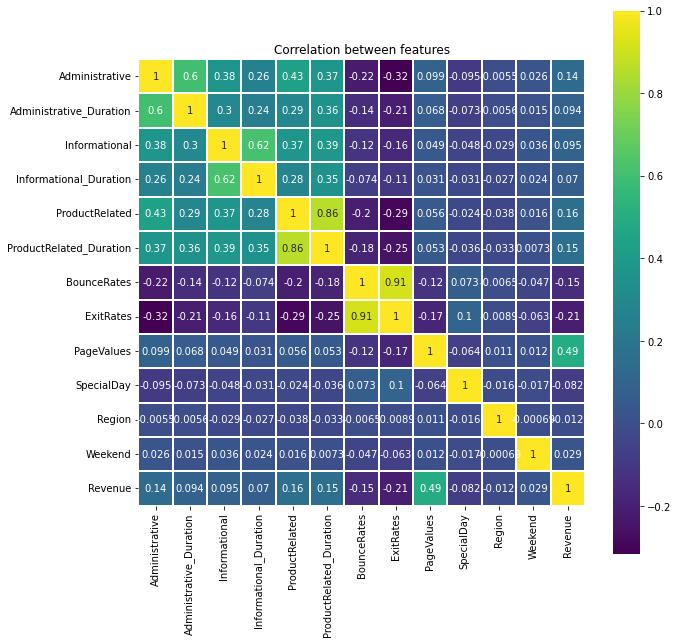

In [162]:
#heatmap그려보기.
plt.figure(figsize=(10, 10))
sns.heatmap(shop_corr, linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [163]:
#데이터 프레임의 dtype을 확인!
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  Region                   12330 non-null  int64  
 12  VisitorType              12330 non-null  object 
 13  Weekend                  12330 non-null  bool   
 14  Revenue               

In [164]:
#값이 빈 칼럼이 있는지 확인!
shop.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
Region                     0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

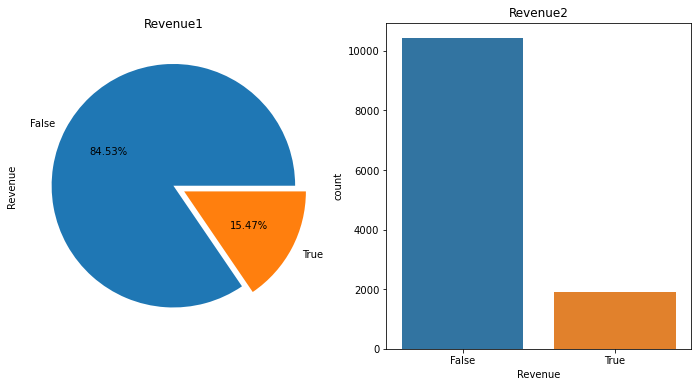

In [165]:
#전체 구매율과 비구매율의 차이를 그래프로 그려보자.
f,ax=plt.subplots(1,2,figsize=(12,6))

shop_Revenue.plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])

ax[0].set_title('Revenue1')

sns.countplot('Revenue', data=shop, ax = ax[1])
ax[1].set_title('Revenue2')
plt.show()

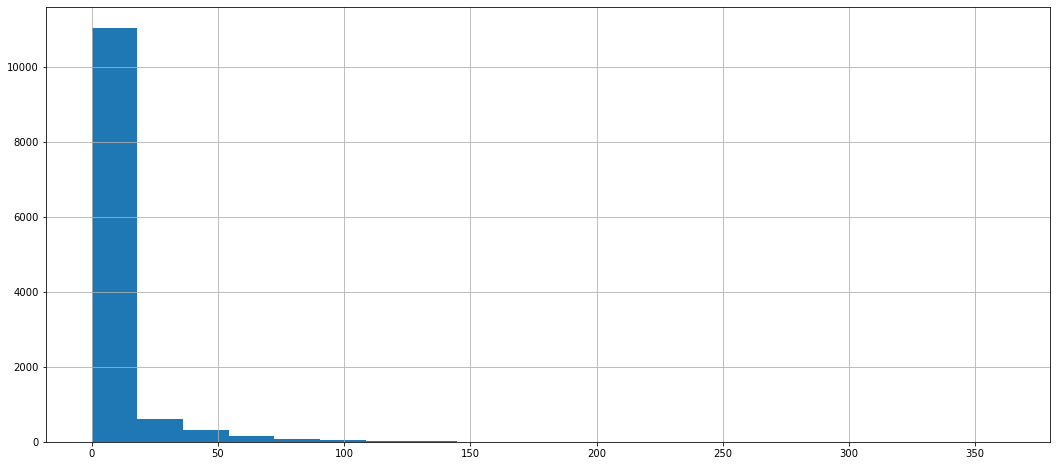

In [166]:
#pagevalues의 값 비율을 바 그래프로 그려보자.
shop['PageValues'].hist(bins=20,figsize=(18,8));

In [167]:
shop.groupby(by='Revenue').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Region,Weekend
Revenue,,,,,,,,,,,,
False,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809,0.025317,0.047378,1.975998,0.068432,3.159278,0.227308
True,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,3.082285,0.261530


In [168]:
shop_visit = shop['VisitorType'].value_counts()
shop_visit

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

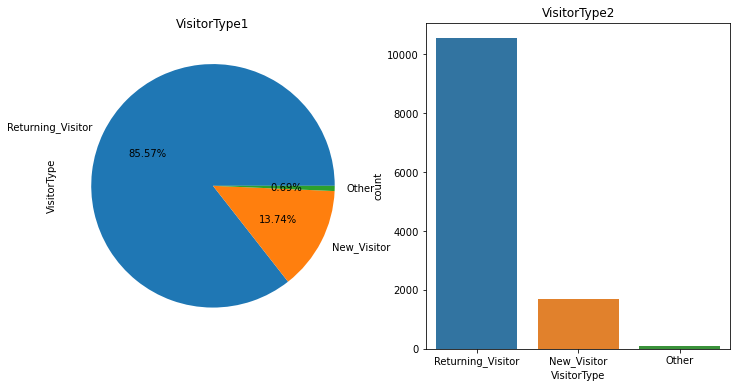

In [169]:
#전체 재방문, 첫 방문, 기타 비율을 그래프로 표현.
f,ax=plt.subplots(1,2,figsize=(12,6))

shop_visit.plot.pie(autopct='%1.2f%%',ax=ax[0])

ax[0].set_title('VisitorType1')

sns.countplot('VisitorType', data=shop, ax = ax[1])
ax[1].set_title('VisitorType2')
plt.show()

In [170]:
#VisitorType을 처음이면 0,  방문한 적 있음 은 1 로 바꾸기
#상품을 구매함,아님을 기준으로 그룹지어 visitortype, specialday를 비교.

In [171]:
def visit(x):
    if x == 'Returning_Visitor':
        return 1#방문한 적이 있음
    else:
        return 0#처음
    

In [172]:
shop['VisitorType'] = shop['VisitorType'].apply(visit)
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,1,1,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,9,1,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,2,1,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,1,1,True,False


In [173]:
shop_visit = shop['VisitorType'].value_counts()#재방문이 1, 처음이 0
shop_visit

1    10551
0     1779
Name: VisitorType, dtype: int64

In [174]:
shop.groupby(by='Revenue').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Region,VisitorType,Weekend
Revenue,,,,,,,,,,,,,
False,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809,0.025317,0.047378,1.975998,0.068432,3.159278,0.87133,0.227308
True,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,3.082285,0.77044,0.261530


In [175]:
#ml을 돌려보자. revenue를 기준으로!

In [176]:
from sklearn.tree import DecisionTreeClassifier

In [177]:
from sklearn.model_selection import train_test_split#훈련용검증용 문제

In [178]:
import random

In [179]:
shop.drop(columns=['Month','Weekend'],inplace=True)
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Region,VisitorType,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,1,1,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,9,1,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,1,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,1,False


In [186]:
exam = shop.iloc[:,:12]
exam.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Region,VisitorType
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,1,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,9,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,1


In [187]:
target = shop['Revenue']
target[:2]

0    False
1    False
Name: Revenue, dtype: bool

In [188]:
#훈련용문제, 검증문제, 훈련답, 검증답 = train_test_split(exam,.....)이런식으로 구성.
#X_train, X_test, y_train, y_test
train_exam, test_exam, train_target,test_target = train_test_split(exam,#문제
                 target#정답
                 ,test_size=0.2#검증비율 20%,훈련비율 80%
                 ,random_state = 100#seed값을 주어 데이터 셋이 변경되지 않게 함.
                )


In [189]:
train_exam.info()#문제

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9864 entries, 8088 to 5640
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9864 non-null   int64  
 1   Administrative_Duration  9864 non-null   float64
 2   Informational            9864 non-null   int64  
 3   Informational_Duration   9864 non-null   float64
 4   ProductRelated           9864 non-null   int64  
 5   ProductRelated_Duration  9864 non-null   float64
 6   BounceRates              9864 non-null   float64
 7   ExitRates                9864 non-null   float64
 8   PageValues               9864 non-null   float64
 9   SpecialDay               9864 non-null   float64
 10  Region                   9864 non-null   int64  
 11  VisitorType              9864 non-null   int64  
dtypes: float64(7), int64(5)
memory usage: 1001.8 KB


In [190]:
train_target.count()#시리즈는 카운트함수 사용가능

9864

In [191]:
train_exam.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Region,VisitorType
8088,4,75.75,0,0.0,71,3534.298611,0.008904,0.023832,0.0,0.0,1,1
8995,2,67.75,0,0.0,11,417.989286,0.016667,0.043148,0.0,0.0,1,1
11372,0,0.00,0,0.0,2,63.500000,0.000000,0.100000,0.0,0.0,1,1
325,4,111.00,0,0.0,4,54.000000,0.000000,0.028571,0.0,0.0,1,1
9947,0,0.00,0,0.0,39,1020.013889,0.005405,0.014226,0.0,0.0,7,1


In [192]:
train_exam.reset_index(inplace=True)

In [193]:
train_exam.head()

,index,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Region,VisitorType
0,8088,4,75.75,0,0.0,71,3534.298611,0.008904,0.023832,0.0,0.0,1,1
1,8995,2,67.75,0,0.0,11,417.989286,0.016667,0.043148,0.0,0.0,1,1
2,11372,0,0.00,0,0.0,2,63.500000,0.000000,0.100000,0.0,0.0,1,1
3,325,4,111.00,0,0.0,4,54.000000,0.000000,0.028571,0.0,0.0,1,1
4,9947,0,0.00,0,0.0,39,1020.013889,0.005405,0.014226,0.0,0.0,7,1


In [194]:
del train_exam['index']
train_exam.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Region,VisitorType
0,4,75.75,0,0.0,71,3534.298611,0.008904,0.023832,0.0,0.0,1,1
1,2,67.75,0,0.0,11,417.989286,0.016667,0.043148,0.0,0.0,1,1
2,0,0.00,0,0.0,2,63.500000,0.000000,0.100000,0.0,0.0,1,1
3,4,111.00,0,0.0,4,54.000000,0.000000,0.028571,0.0,0.0,1,1
4,0,0.00,0,0.0,39,1020.013889,0.005405,0.014226,0.0,0.0,7,1


In [195]:
test_exam.reset_index(inplace=True)

In [196]:
test_exam.head()

,index,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Region,VisitorType
0,2520,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,3,1
1,2412,0,0.000000,0,0.0,12,499.000000,0.000000,0.018182,86.388000,0.0,6,0
2,762,0,0.000000,0,0.0,16,519.750000,0.012500,0.040000,0.000000,0.0,3,1
3,5916,12,245.733333,4,1511.7,439,21857.046480,0.003589,0.012498,11.439233,0.0,1,1
4,10524,0,0.000000,0,0.0,28,912.434849,0.000000,0.026840,0.000000,0.0,7,1


In [197]:
del test_exam['index']

In [198]:
test_exam.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Region,VisitorType
0,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,3,1
1,0,0.000000,0,0.0,12,499.000000,0.000000,0.018182,86.388000,0.0,6,0
2,0,0.000000,0,0.0,16,519.750000,0.012500,0.040000,0.000000,0.0,3,1
3,12,245.733333,4,1511.7,439,21857.046480,0.003589,0.012498,11.439233,0.0,1,1
4,0,0.000000,0,0.0,28,912.434849,0.000000,0.026840,0.000000,0.0,7,1


In [199]:
train_target = train_target.reset_index()
test_target = test_target.reset_index()
test_target[:5]

,index,Revenue
0,2520,False
1,2412,True
2,762,False
3,5916,False
4,10524,False


In [200]:
del test_target['index']
del train_target['index']

In [201]:
test_target[:5]

,Revenue
0,False
1,True
2,False
3,False
4,False


In [202]:
train_target[:5]

,Revenue
0,False
1,False
2,False
3,False
4,False


In [216]:
# tree_clf = DecisionTreeClassifier(
#         max_depth=3, random_state=42
# )
depth=list(range(1,10))
depth_result=[]
for i in depth:
    tree_clf=DecisionTreeClassifier(max_depth=i, 
                                random_state=42
                                   )
    tree_clf.fit(train_exam, train_target)
    tree_clf.score(train_exam,train_target)
    com_target=tree_clf.predict(test_exam)
    depth_result.append(accuracy_score(test_target, com_target))
    


In [217]:
tree_clf.fit(train_exam, train_target) #많이 공부!!

DecisionTreeClassifier(max_depth=9, random_state=42)

In [218]:
tree_clf.score(train_exam, train_target) #많이 공부한 것에 대한 점수

0.9327858880778589

In [219]:
train_exam.isnull().sum()#빈값이 있는지 확인

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Region                     0
VisitorType                0
dtype: int64

In [220]:
#fit가 공부하는 함수
tree_clf.fit(train_exam,train_target)#트레인 데이터에 대한 정확도

DecisionTreeClassifier(max_depth=9, random_state=42)

In [221]:
tree_clf.score(train_exam, train_target)

0.9327858880778589

In [222]:
from sklearn.metrics import accuracy_score

In [223]:
com_target = tree_clf.predict(test_exam)
com_target[:5]
#검증용 데이터로 검증
#검증해본 결과 test data에 대한 정확도!
#컴퓨터가 예측한 값들과 검증용 데이터의 정답과의 비교, 정확도를 계산할 예정!

array([False,  True, False,  True, False])

In [224]:
accuracy_score(test_target, com_target) #문제를 푼 답과 정답지를 비교해서 채점!
#정확도를 계산,정답률

0.875506893755069

In [225]:
com_target = tree_clf.predict(test_exam)

In [226]:
train_exam.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Region',
       'VisitorType'],
      dtype='object')

In [228]:
A1 = [0,0,0,0,0,0,0,0,10,0.5,0,1]

In [229]:
result1 = tree_clf.predict_proba([A1])
result1

array([[0.03571429, 0.96428571]])